# HIV Risk Predictive Model

# 1.0 Project Overview
# 1.1 Introduction

According to HIV & AIDS world outlook reports highlights HIV as the biggest global health issue with approximately 38 million infected worldwide(WHO(2020), UNAIDS(2020)).The disease mostly affects adolescent girls and young women (AGYW), who are at a higher risk of HIV infection due to a combination of biological, socio-economic, and behavioral factors (WHO(2020), UNAIDS(2019)).

Regionally, sub-Saharan Africa is bearing the bulk of the epidemic and bears nearly 70% of the world's HIV cases (WHO(2020), UNAIDS(2019)).

Locally in Kenya, HIV remains a significant public health issue among AGYW relative to their counterparts who are male. Structural impediments such as gender disparities, levels of poverty, and limited access to education and health care leave AGYW in some of the counties vulnerable to increased vulnerability (National AIDS Control Council, 2020; Ministry of Health Kenya, 2021). Despite interventions such as the Aid-Funded programs that seek to stem HIV infections by surmounting these structural drivers, the challenge of reaching high-risk groups and utilizing existing resources to the fullest for intervention still exists.This research will, therefore adopt Cross Industry Standard Procedures- Data Mining(CRISP-DM) methodology for the health industry.


# 2.0 Business Understanding

Health risks like the Human Immunodeficiency Virus (HIV) is still a major public health problem among adolescent girls and young women (AGYW) in Kenya. AGYW still carry an unbalanced burden of HIV despite the universal national and global campaigns, including the DREAMS program (Determined, Resilient, Empowered, AIDS-Free, Mentored, and Safe). AGYW have a greater risk of HIV infection than their male counterparts because of a mix of biological, socio-economic, and behavioral determinants(WHO(2020); https://www.who.int/news-room/fact-sheets/detail/adolescents-health-risks-and-solutions, UNAIDS(2019); https://www.unaids.org/sites/default/files/media_asset/2019-global-AIDS-update_en.pdf).

In Kenya, counties vary in their socio-economic, cultural, and health environments. These are the determinants of HIV vulnerability, access to care, and success of interventions. Even with focused interventions, identifying those most vulnerable and effectively allocating resources to prevent infections is a challenge.

The overall goal of this project is to establish a predictive model to assess HIV risk among AGYW based collected data from select counties. This model, data first problem, will identify individuals who are most at risk of acquiring HIV. The final model will help stakeholders to scale up to cover more counties, channel interventions more effectively and allocate funds more appropriately to those most at risk so that new HIV infection cases can be minimized in these societies.

# 3.0 Data Understanding

## 3.1 Data Description
The dataset used in this project contains detailed demographic, behavioral, and intervention-related information on adolescent girls and young women (AGYW) participating in the DREAMS program. The data includes key indicators such as:

Demographic Information – Age, county, household structure, parental status.
Socioeconomic Status – Household size, food security, income sources.
Education & Behavior – School attendance, history of sexual activity, condom use.
HIV Testing & Status – HIV testing history, last test result.
DREAMS Program Participation – Interventions received (biomedical, behavioral, social protection).
Exit Status – Whether participants continued or exited the program and the reason for exiting.
This dataset provides a comprehensive view of factors affecting HIV risk among AGYW, allowing for predictive modeling and impact evaluation.

## 3.2 Data Source
The data is sourced from health related data records of aid-funded program (PEPFAR DREAMS program) in kenya on select counties.

## 3.3 Data loading and preview

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import summarytools as st
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
#Loading the dreams dataset
df = pd.read_csv('./data/hiv_raw_dataset.csv')

### Preview dataset

In [3]:
#Preview first five rows
df.head()

,date_of_birth,date_of_enrollment,Agency,implementing_partner_name,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,58.0,Yes,Yes,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,43.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,41.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,45.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,42.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


### Shape of the dataset

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 455807 rows and 44 columns


In [5]:
df.head()

,date_of_birth,date_of_enrollment,Agency,implementing_partner_name,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,58.0,Yes,Yes,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,43.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,41.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,NaN,45.0,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,NaN,42.0,Yes,Yes,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [6]:
df['result'].value_counts()

result
Negative    454788
Positive      1019
Name: count, dtype: int64

## 3.4 Problem Statement

## 3.5 Metrics of Success

# 4.0 Data Preparation

## 4.1 Data Cleaning

This involves checking on data validity, accuracy, completeness, accuracy, consistency and uniformity. These will be carried out on the select datasets that are within the scope of reasearch.

### 4.1.1 Data completeness; Checking for missing values


In [7]:
missing_values_in_percentage = (df.isna().sum()/ len(df)*100).sort_values(ascending=False)
print(f"Missing values in percentage for each column : \n{missing_values_in_percentage}")

Missing values in percentage for each column : 
head_of_household_other              98.692429
dreams_program_other                 98.561233
exit_reason_other                    94.362087
dreams_program                       89.807309
used_condom_with_last_partner        53.442575
age_of_last_partner                  53.372370
age_at_first_sexual_encounter        50.361447
has_sexual_partner                   50.351574
current_school_level                 44.068213
no_of_days_missed_food_in_4wks       43.668482
current_income_source                28.425189
Agency                               23.938860
exit_reason                          15.326882
exit_age                             15.080725
parents_alive_status                 14.349056
age_of_household_head                 4.611162
father_alive                          2.941596
mother_alive                          2.849232
head_of_household                     2.109445
county                                2.030684
no_of_childr

### Observations;
* Some columns has significantly high percentage of missing values; above 50%, dropping these features may not be impactful

In [8]:
# Drop features with above 50% of missing values
df = df.drop(['head_of_household_other','dreams_program_other','exit_reason_other','dreams_program','used_condom_with_last_partner',
              'age_of_last_partner','age_at_first_sexual_encounter','has_sexual_partner'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   Agency                             346692 non-null  object 
 3   implementing_partner_name          455807 non-null  object 
 4   county                             446551 non-null  object 
 5   head_of_household                  446192 non-null  object 
 6   age_of_household_head              434789 non-null  float64
 7   father_alive                       442399 non-null  object 
 8   mother_alive                       442820 non-null  object 
 9   are_both_parents_alive             455807 non-null  object 
 10  is_one_parent_alive                455807 non-null  object 
 11  parents_alive_status               3904

In [10]:
# function to fill missing values with median for numerical features and mode for categorical features
def impute(df):
    # numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        df[feature] = df[feature].fillna(df[feature].median())
    
    # categorical features
    cat_features = df.select_dtypes(include=[object]).columns
    for feature in cat_features:
        df[feature] = df[feature].fillna(df[feature].mode()[0]) 
    
    return df

# fill missing values usng the function
df_imputed = impute(df)

In [11]:
# Check imputed dataset info
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455807 non-null  object 
 2   Agency                             455807 non-null  object 
 3   implementing_partner_name          455807 non-null  object 
 4   county                             455807 non-null  object 
 5   head_of_household                  455807 non-null  object 
 6   age_of_household_head              455807 non-null  float64
 7   father_alive                       455807 non-null  object 
 8   mother_alive                       455807 non-null  object 
 9   are_both_parents_alive             455807 non-null  object 
 10  is_one_parent_alive                455807 non-null  object 
 11  parents_alive_status               4558

### 4.1.2  Validity check

Checking irrelevant features and removing them; feature selection

In [12]:
df_imputed.head()

,date_of_birth,date_of_enrollment,Agency,implementing_partner_name,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,...,exit_reason,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age
0,9/16/2004,2/22/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,58.0,Yes,Yes,Yes,...,Graduation,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,20.0
1,8/2/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,43.0,Yes,Yes,Yes,...,Graduation,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,20.0
2,10/20/2005,3/7/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,41.0,No,Yes,No,...,Graduation,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,20.0
3,1/18/2006,3/3/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,45.0,No,Yes,No,...,Graduation,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,20.0
4,3/22/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,42.0,Yes,Yes,Yes,...,Graduation,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,20.0


In [13]:
df_imputed.shape

(455807, 36)

### Observations
* Exit_status, exit_reason and exit age may not be predisposing or mitigating factors to HIV risk among AGYW enrolled in the program
* Hence, dropping may not have negative impact on the dataset.

In [14]:
df_imputed = df_imputed.drop(['exit_status','exit_reason','exit_age'], axis=1)
df_imputed.head()

,date_of_birth,date_of_enrollment,Agency,implementing_partner_name,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,...,last_test_result,ever_had_sex,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions
0,9/16/2004,2/22/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,58.0,Yes,Yes,Yes,...,Negative,No,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0
1,8/2/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,43.0,Yes,Yes,Yes,...,Negative,No,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0
2,10/20/2005,3/7/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,41.0,No,Yes,No,...,Negative,No,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0
3,1/18/2006,3/3/2020,USAID,USAID Tumikia Mtoto,Nairobi,Mother,45.0,No,Yes,No,...,Negative,No,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0
4,3/22/2004,12/18/2019,USAID,USAID Tumikia Mtoto,Nairobi,Father,42.0,Yes,Yes,Yes,...,Negative,No,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0


In [15]:
df_imputed.shape

(455807, 33)

### 4.1.3 Data accuracy
Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

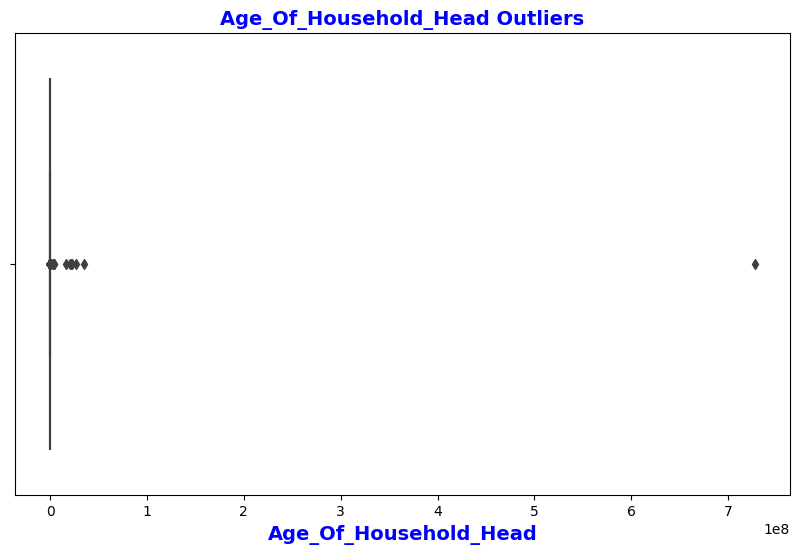

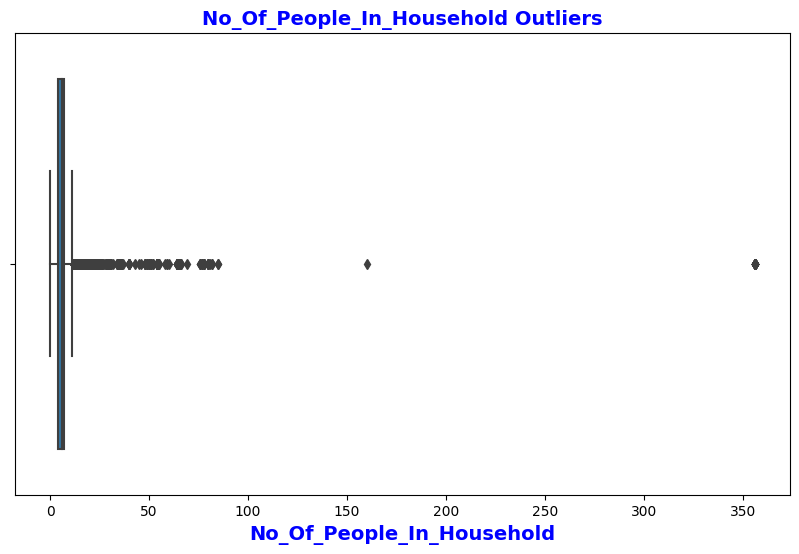

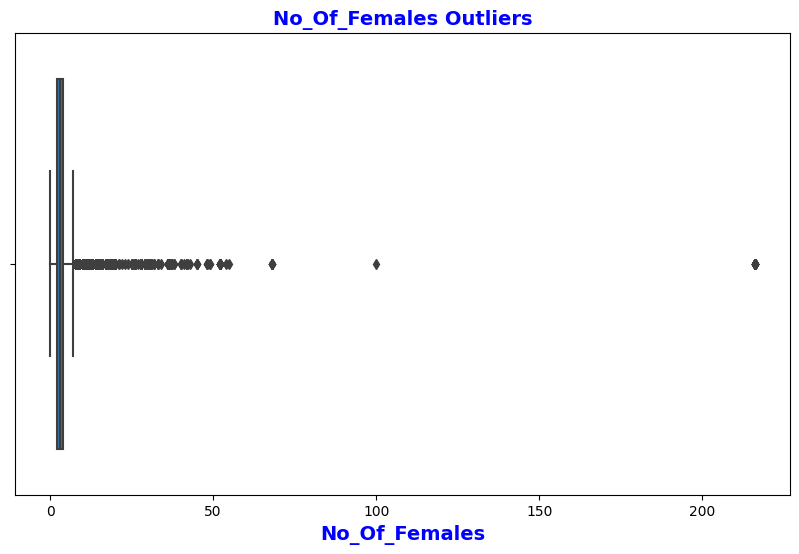

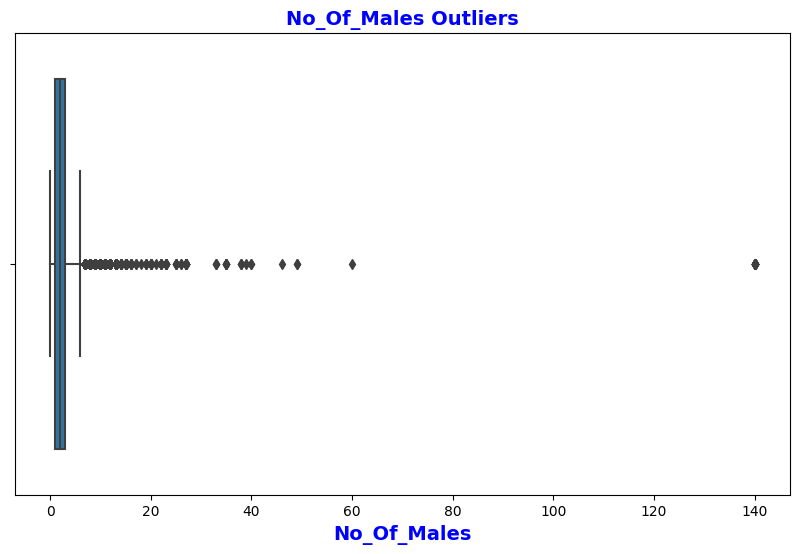

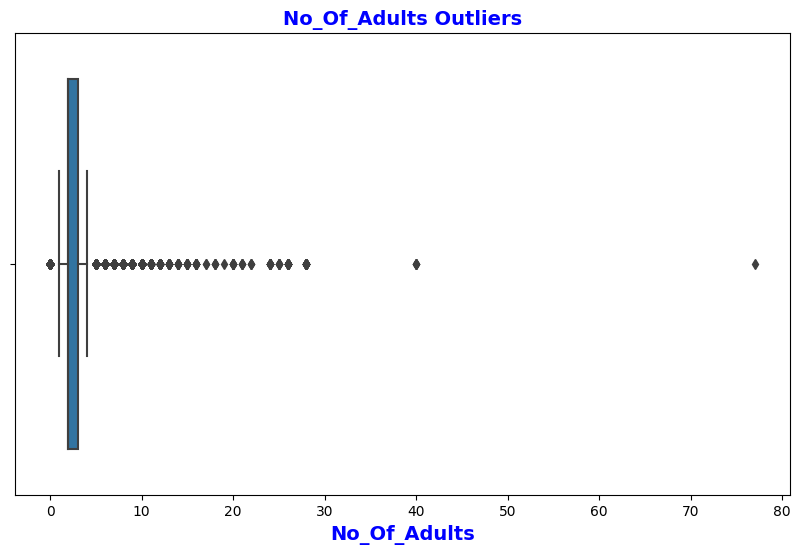

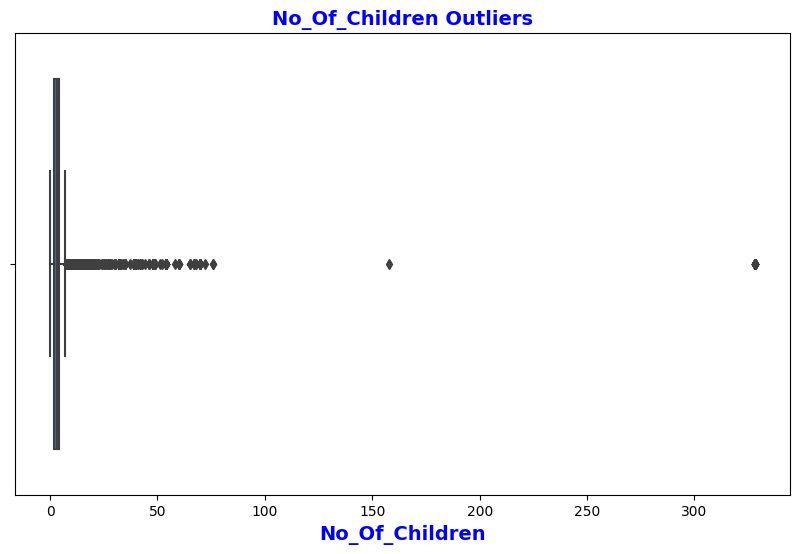

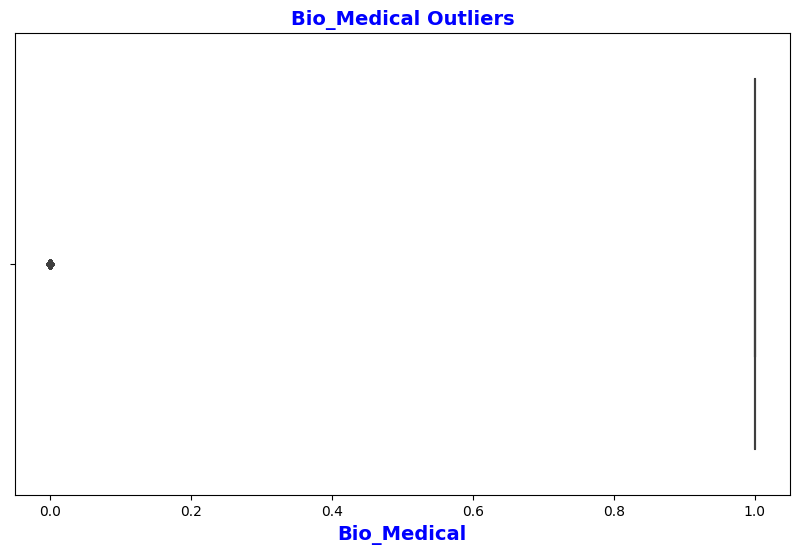

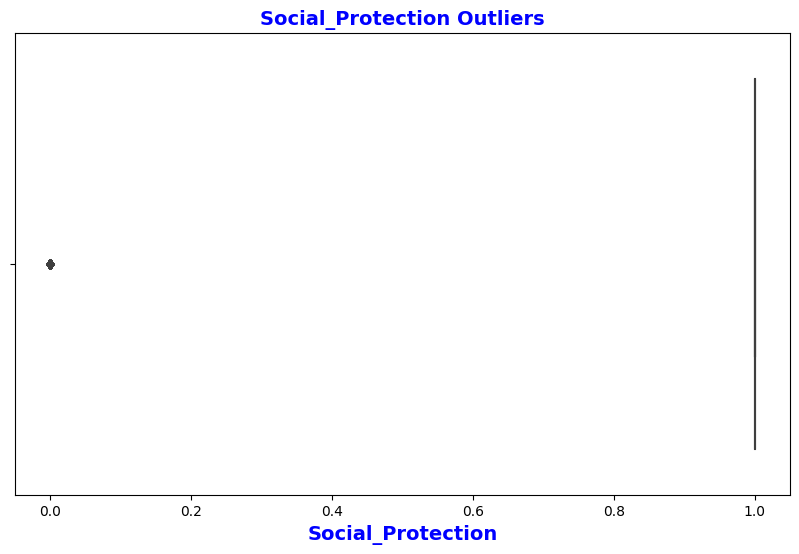

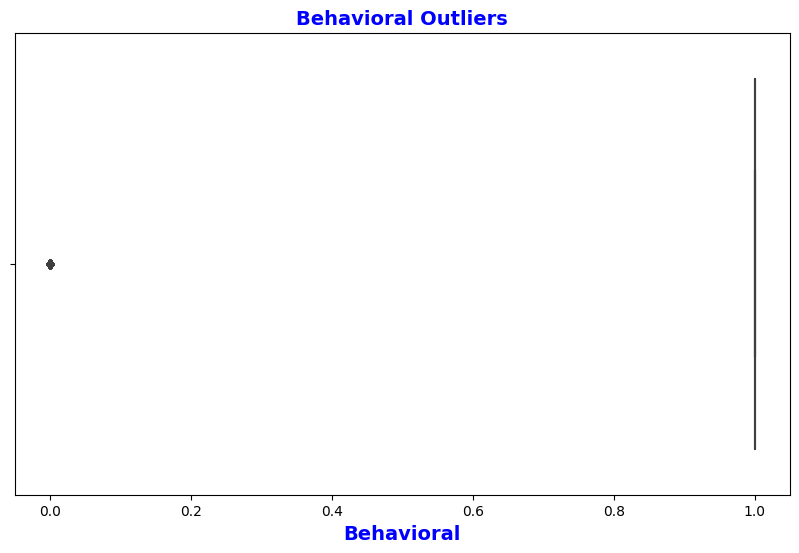

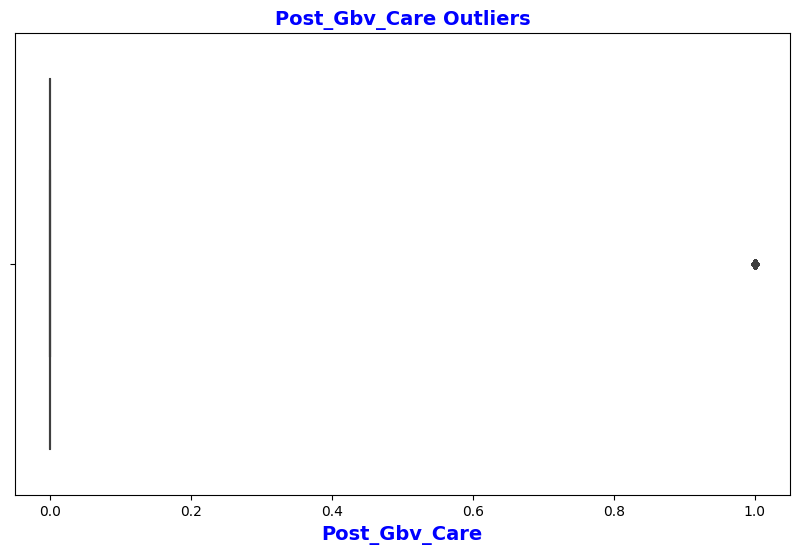

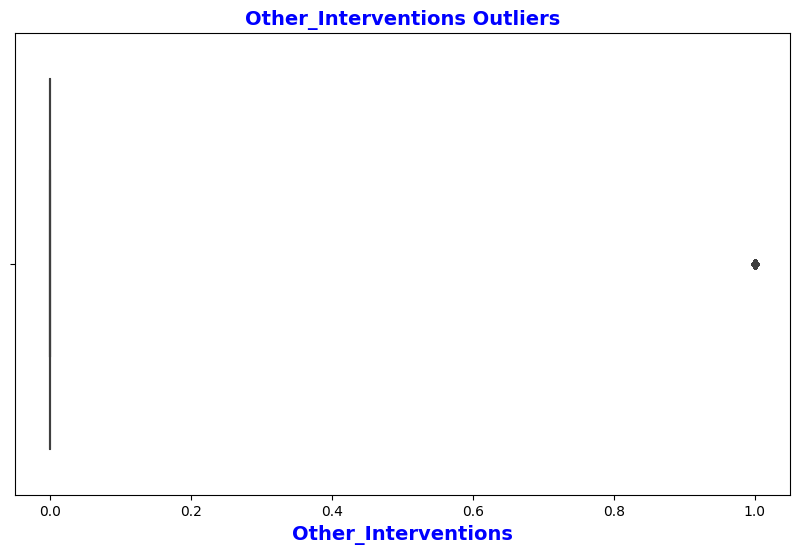

In [16]:
# Check for outliers using boxplot visuals
numerical_features = df_imputed.select_dtypes(include=['number']).columns

# Loop through each numerical feature to create a boxplot
for feature in numerical_features:
    plt.figure(figsize = (10, 6))
    
    # Create the boxplot for the feature
    sns.boxplot(x = df_imputed[feature])

    # Set the title and axis labels
    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    
    # Show the plot
    plt.show()


### Filter outliers and replace with median value

In [17]:
#Function to filter outliers in numerical features  and replace with median
def filter_outliers(df):

    for column in df.select_dtypes(include=[np.number]).columns:

        #calculate quantiles(1st and 3rd) and interquarterly range
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        #Lower and upper limits
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR

        #Meadian value
        median_value = df[column].median()

        #Replace outliers
        df[column] = df[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)

    return df

In [18]:
filtered_df = filter_outliers(df_imputed)

In [19]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,455807.0,42.023297,11.618914,10.0,34.0,42.0,50.0,74.0
no_of_people_in_household,455807.0,5.600708,2.104048,0.0,4.0,6.0,7.0,11.0
no_of_females,455807.0,3.220571,1.374374,0.0,2.0,3.0,4.0,7.0
no_of_males,455807.0,2.346399,1.355609,0.0,1.0,2.0,3.0,6.0
no_of_adults,455807.0,2.230677,0.790926,1.0,2.0,2.0,3.0,4.0
no_of_children,455807.0,3.052836,1.718713,0.0,2.0,3.0,4.0,7.0
bio_medical,455807.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
social_protection,455807.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
behavioral,455807.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
post_gbv_care,455807.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### Visualize filtered dataframe numerical features

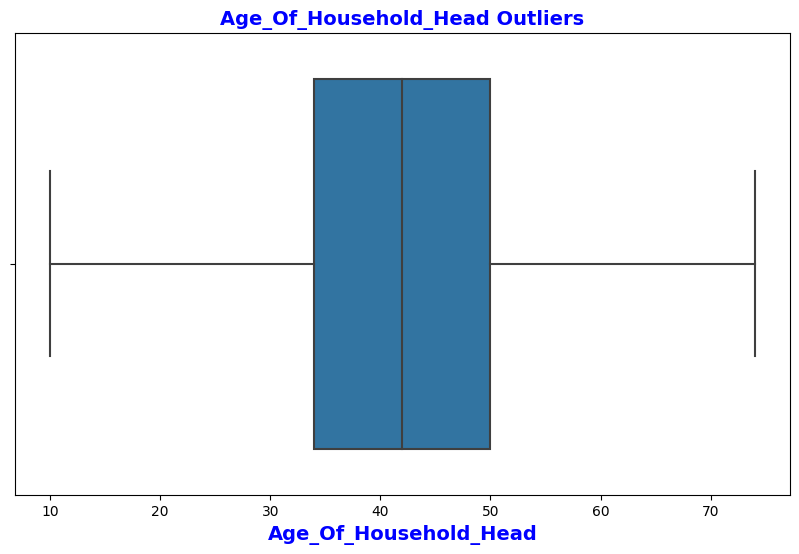

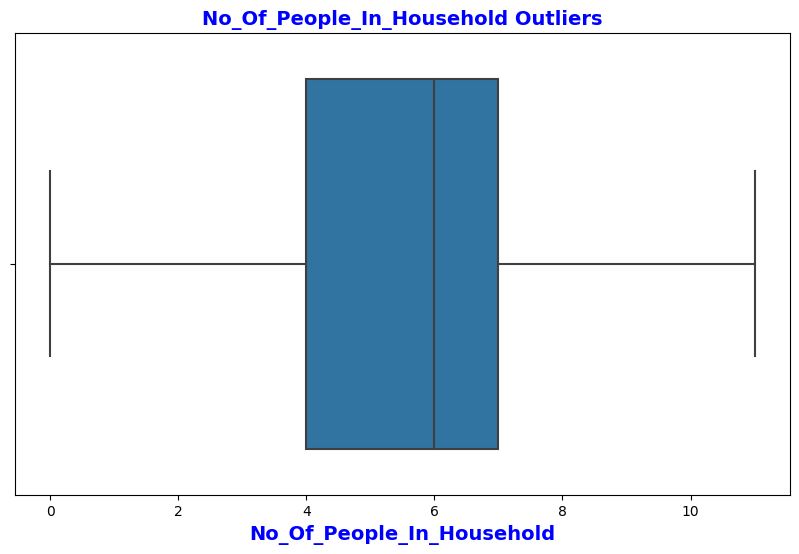

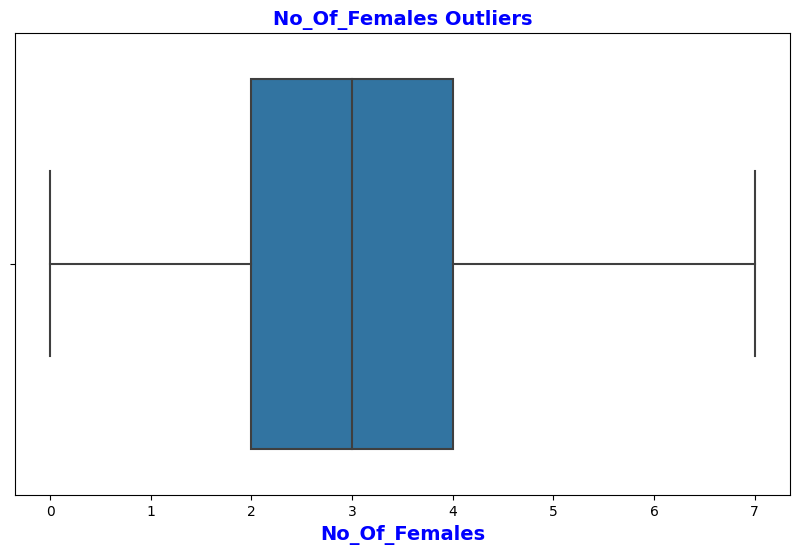

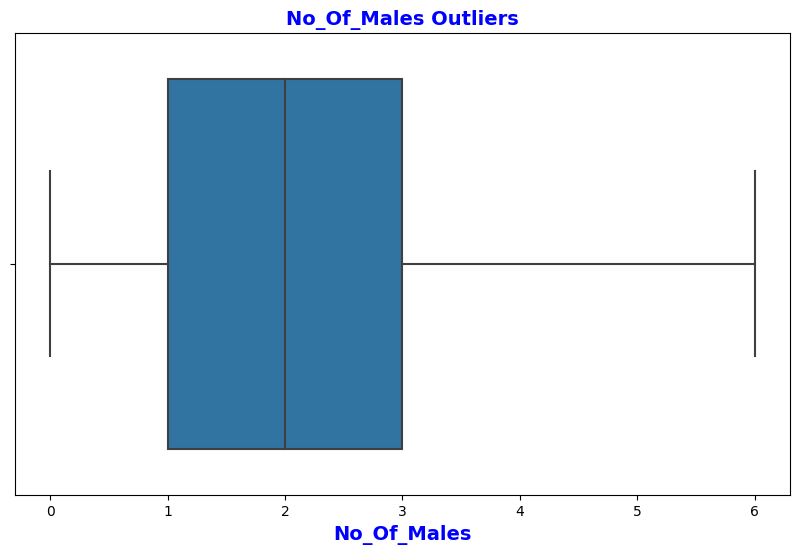

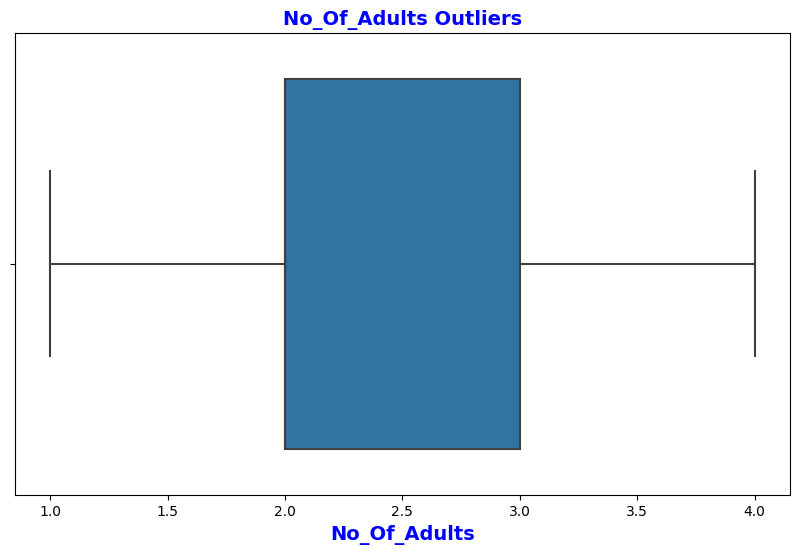

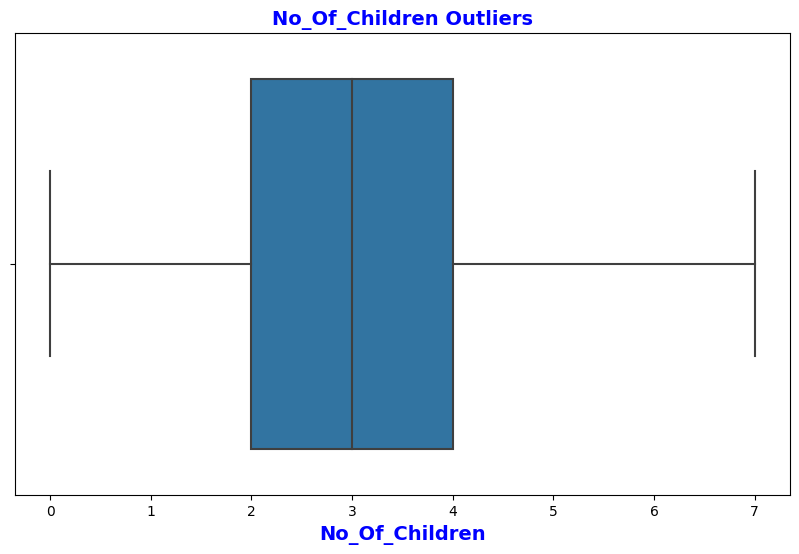

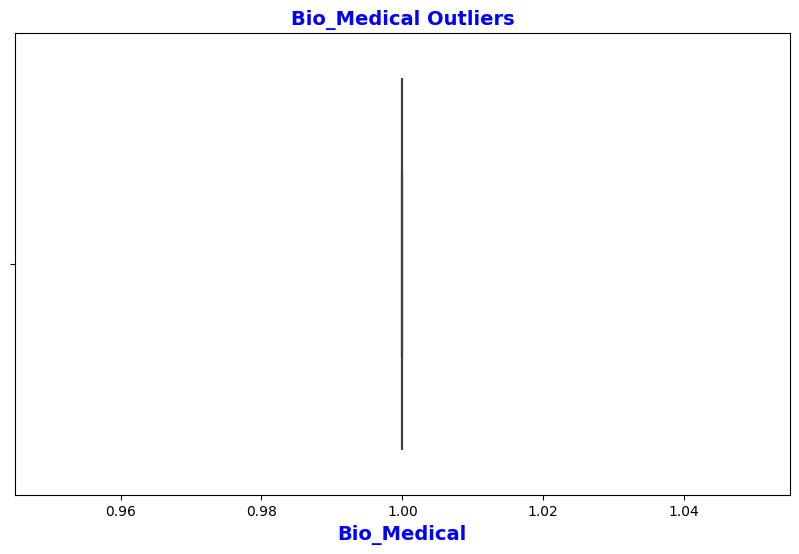

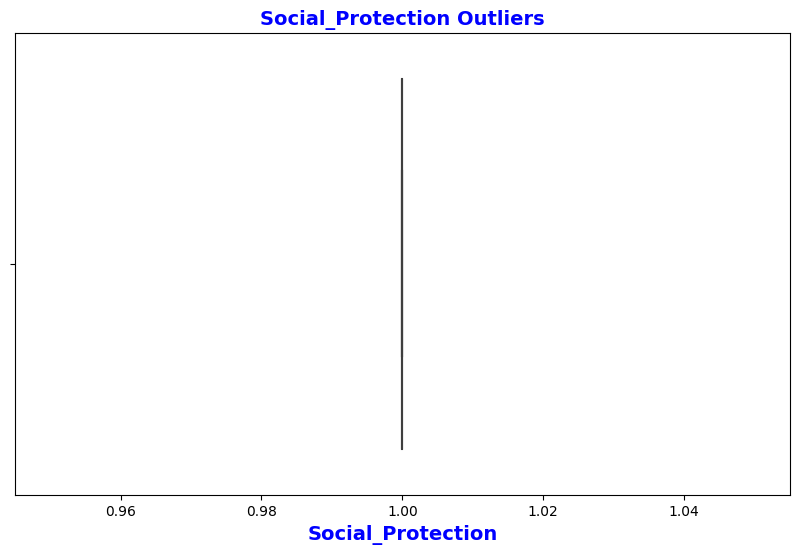

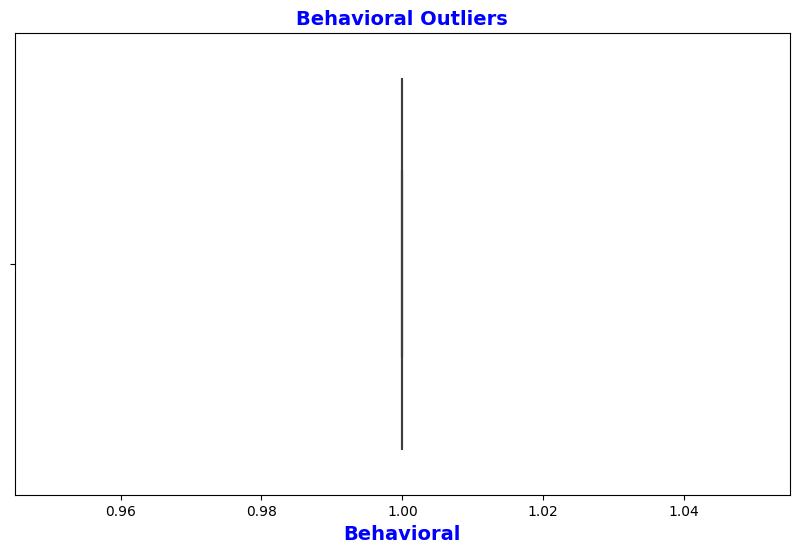

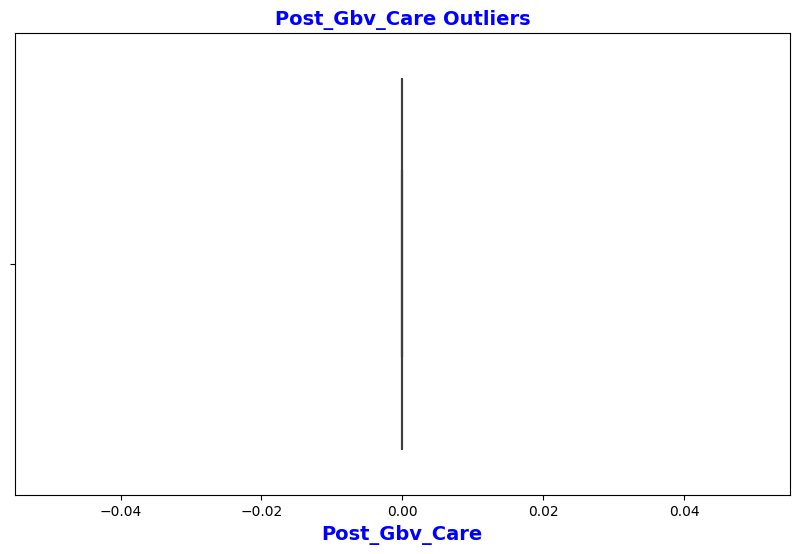

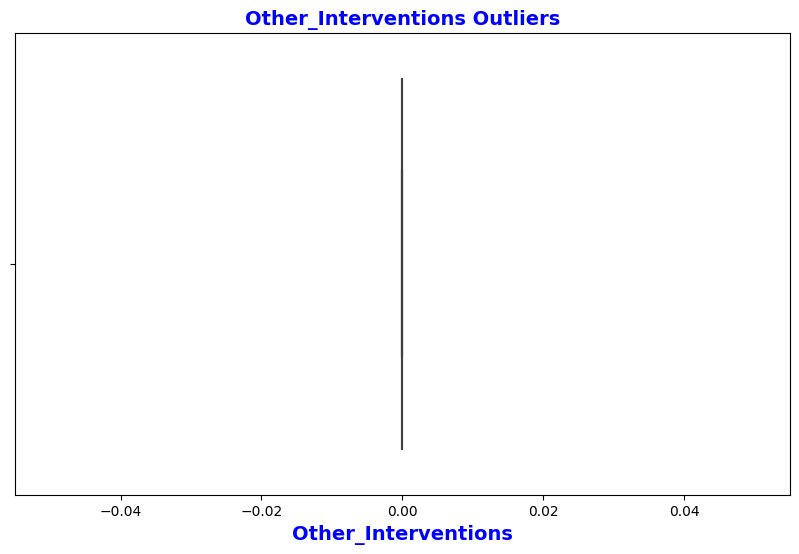

In [20]:
# Check for outliers using boxplot visuals
numerical_features = filtered_df.select_dtypes(include=['number']).columns

# Loop through each numerical feature to create a boxplot
for feature in numerical_features:
    plt.figure(figsize = (10, 6))
    
    # Create the boxplot for the feature
    sns.boxplot(x = filtered_df[feature])

    # Set the title and axis labels
    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    
    # Show the plot
    plt.show()

### 4.1.4 Data consistency
Consistency is achieved through removal of duplicates in the dataframe

In [21]:
#Check for duplicates
print(f'There are total of {filtered_df.duplicated().sum()} duplicates in the filtered dataframe')

There are total of 167 duplicates in the filtered dataframe


In [22]:
#Drop duplicates
filtered_df = filtered_df.drop_duplicates()

In [23]:
filtered_df.duplicated().sum()

0

### 4.1.5 Data Uniformity
Involves feature engineering

Feature engineer age at enrollment

In [24]:
#Calculate age at enrollment
from datetime import datetime
filtered_df['date_of_birth'] = pd.to_datetime(filtered_df['date_of_birth'])
filtered_df['date_of_enrollment'] = pd.to_datetime(filtered_df['date_of_enrollment'])
filtered_df['age_at_enrollment'] = (filtered_df['date_of_enrollment'] - filtered_df['date_of_birth']).dt.days // 365

### Uniformity of column names

In [25]:
#Remove white spaces in column names and change to lower case
filtered_df.columns = filtered_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [26]:
filtered_df.columns

Index(['date_of_birth', 'date_of_enrollment', 'agency',
       'implementing_partner_name', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
       'no_of_people_in_household', 'no_of_females', 'no_of_males',
       'no_of_adults', 'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'ever_tested_for_hiv',
       'last_test_result', 'ever_had_sex', 'intervention_name',
       'intervention_date', 'result', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions',
       'age_at_enrollment'],
      dtype='object')

In [27]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455640 entries, 0 to 455806
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date_of_birth                      455640 non-null  datetime64[ns]
 1   date_of_enrollment                 455640 non-null  datetime64[ns]
 2   agency                             455640 non-null  object        
 3   implementing_partner_name          455640 non-null  object        
 4   county                             455640 non-null  object        
 5   head_of_household                  455640 non-null  object        
 6   age_of_household_head              455640 non-null  float64       
 7   father_alive                       455640 non-null  object        
 8   mother_alive                       455640 non-null  object        
 9   are_both_parents_alive             455640 non-null  object        
 10  is_one_parent_alive      

### 4.1.6 Save clean dataset

In [28]:
#Save copy of cleaned dataset
clean_df = filtered_df.copy()

In [29]:
clean_df.head()

,date_of_birth,date_of_enrollment,agency,implementing_partner_name,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,...,ever_had_sex,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,age_at_enrollment
0,2004-09-16,2020-02-22,USAID,USAID Tumikia Mtoto,Nairobi,Mother,58.0,Yes,Yes,Yes,...,No,HTS - HTS (Client),8/8/2020,Negative,1.0,1.0,1.0,0.0,0.0,15
1,2004-08-02,2019-12-18,USAID,USAID Tumikia Mtoto,Nairobi,Father,43.0,Yes,Yes,Yes,...,No,HTS - HTS (Client),4/27/2020,Negative,1.0,1.0,1.0,0.0,0.0,15
2,2005-10-20,2020-03-07,USAID,USAID Tumikia Mtoto,Nairobi,Mother,41.0,No,Yes,No,...,No,HTS - HTS (Client),8/12/2020,Negative,1.0,1.0,1.0,0.0,0.0,14
3,2006-01-18,2020-03-03,USAID,USAID Tumikia Mtoto,Nairobi,Mother,45.0,No,Yes,No,...,No,HTS - HTS (Client),8/12/2020,Negative,1.0,1.0,1.0,0.0,0.0,14
4,2004-03-22,2019-12-18,USAID,USAID Tumikia Mtoto,Nairobi,Father,42.0,Yes,Yes,Yes,...,No,HTS - HTS (Client),4/27/2020,Negative,1.0,1.0,1.0,0.0,0.0,15


# 5.0 Exploratory Data Analysis(EDA)
This is the process of analyzing data to reveal trends and patterns, detect anomalies, test hypotheses and check assumptions using visuals and summary statistics.Turkey,J.W(1977)

Key goals of EDA include:

Understanding the data: Getting a sense of the data's distribution, range, and central tendencies. Identifying patterns: Discovering trends, correlations, or anomalies within the data. Checking assumptions: Verifying assumptions made about the data before further analysis or modeling. Generating hypotheses: Developing potential explanations or questions based on the findings.

## 5.1 Univariate Analysis


## 5.2 Bivariate Analysis


## 5.3 Multivariate Analayis


# 6.0 Modeling

## 6.1 Baseline Model

In [30]:
# Logistic regression
#target and predictors
X = clean_df.drop('result', axis=1)
y = clean_df['result'].map({'Negative':0, 'Positive':1})

In [31]:
#train and test splits
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
 #separate categorical and numerical features
num_cols = X.select_dtypes(include=('int64', 'float64')).columns
cat_cols = X.select_dtypes(include='object').columns



In [33]:
#Pipeline 
numerical_transformer = Pipeline(steps=[
     
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
      
    ('ohe', OneHotEncoder(handle_unknown='ignore')) 
])

#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [34]:
#Baseline model as logistic regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [35]:
#Fit baseline model
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtype=...
       'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'intervention_name', 'intervention_date'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [36]:
#Make predictions
y_pred = lr_model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 87.16%
Precision: 0.70%
Recall: 36.65%
F1 Score: 1.37%


In [38]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[79347 11560]
 [  140    81]]


### Observation
* Classifier is heavily biased towards dominant class(negative class)
* Model performance is very low despite setting class_weight to 'balanced'

## Undersampling dominant class to match minority class

In [39]:
#balancing classes 
negative_class = clean_df[clean_df['result']=='Negative']
positive_class = clean_df[clean_df['result']=='Positive']

In [40]:
# Undersampling the majority negative class to match the size of the minority positive class
negative_class_undersampled = negative_class.sample(n=len(positive_class), random_state=42)

In [41]:
# Concatinate the undersampled negative class with the positive class
balanced_df = pd.concat([negative_class_undersampled, positive_class])

In [42]:
# Randomly shuffle the balanced dataset and reset index
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [43]:
# Separate predictor features and target
X_balanced = balanced_df.drop(columns=['result'])
y_balanced = balanced_df['result'].map({'Negative':0, 'Positive':1})

In [44]:
#train and test splits
X_train_balanced, X_test_balanced, y_train_balanced,y_test_balanced= train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=42)

In [45]:
# Fit model 
lr_model.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtype=...
       'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'intervention_name', 'intervention_date'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [46]:
#Make predictions
y_pred_balanced = lr_model.predict(X_test_balanced)

In [47]:
# confusion matrix for balanced dataset
cm_bal = confusion_matrix(y_test_balanced, y_pred_balanced)
print("Confusion Matrix:\n", cm_bal)

Confusion Matrix:
 [[143  67]
 [ 55 143]]


In [48]:
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
precision = precision_score(y_test_balanced, y_pred_balanced)
recall = recall_score(y_test_balanced, y_pred_balanced)
f1 = f1_score(y_test_balanced, y_pred_balanced)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 70.10%
Precision: 68.10%
Recall: 72.22%
F1 Score: 70.10%


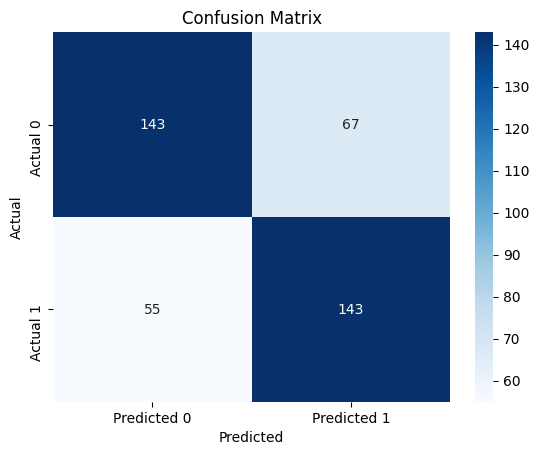

In [49]:
cm = confusion_matrix(y_test_balanced, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest